# COGS 108 - Spending on Healthcare: The Impact on Quality and Outcomes

# Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [`X`] YES - make available
* [  ] NO - keep private

# Names

- Giselle Carames
- Elif Yildiz
- Emily Chang
- Ravi Shende
- Aisha Wolff

# Abstract

Please write one to four paragraphs that describe a very brief overview of why you did this, how you did, and the major findings and conclusions.

# Research Question

How does healthcare quality in terms of preventable deaths, average hospital stay, access medical technology, and life expectancies correlate with healthcare expenditure per capita by each OECD (Organization for Economic Cooperation and Development) country from 2000-2019?



## Background and Prior Work

Healthcare spending is a heavily debated topic in politics, but can we learn from the outcomes of countries' different healthcare policies around the world? We aim to research the correlation between healthcare expenditure per capita and quality of received care among developed countries with public healthcare systems. Here, we define quality of care as a collection of the proportion of preventable deaths, surgery wait times, life expectancies, and healthcare satisfaction rates. The amount of financial resources allocated to healthcare in various individual countries have been found to impact the overall quality of the healthcare provided. How healthcare outcomes correlate with the amount of healthcare expenditure has gotten mixed results, although many results find a positive correlation, especially in OECD countries. OECD countries are a collection of countries with market-based economies that work together to create policies for sustainable growth. 

The previous works differ in the exact results because of different metrics used. However, even though there may be a mild positive correlation between healthcare expenditure and overall satisfaction in most, a lot of results also indicate that there is no clear positive or negative correlation between healthcare expenditure and quality of care received2 -- especially when the spending is not efficiently utilized,3. The study published by The Annals of Internal Medicine is a synthesis of several prior studies to determine if there is an association between healthcare cost and quality in the United States2. It observes studies over the years of 1990-2012, concluding that the association was relatively clinically insignificant. This is one of the reasons why we decided to focus solely on countries with public healthcare systems, as government spending has a larger direct impact on the healthcare system as a whole.

1. ^ Anwar, Asim, et al. (22 Mar. 2023) Government Health Expenditures and Health Outcome Nexus: A Study on OECD Countries. Frontiers, Frontiers. www.frontiersin.org/journals/public-health/articles/10.3389/fpubh.2023.1123759/full.
2. ^ Hussey, Peter S, et al. (1 Jan. 2013) The Association Between Health Care Quality and Cost: A Systematic Review ACP Journals. Annals of Internal Medicine. www.acpjournals.org/doi/10.7326/0003-4819-158-1-201301010-00006?url_ver=Z39.88-2003&rfr_id=ori:rid:crossref.org&rfr_dat=cr_pub%20%200pubmed.
3. ^ Fowler, Floyd J, et al. (28 May 2008) Relationship between Regional per Capita Medicare Expenditures and Patient Perceptions of Quality of Care. JAMA, JAMA Network. www.jamanetwork.com/journals/jama/fullarticle/181980.

# Hypothesis


Increased healthcare expenditure per capita is positively correlated with lower preventable deaths, shorter hospital stay lengths, greater medical technology access, and higher life expectancies at birth across countries.

**Explanation:**

In our background analysis, we found that several previously conducted studies indicated that greater healthcare expenditure correlates to increased healthcare quality. As such, we expect similarly positive results since our definition of healthcare quality includes variables similar to those analyzed across previous studies. We believe this is further increased by the fact that we have carefully narrowed our scope to OECD countries with public healthcare.

# Data

##  - Data overview

All information for each dataset can be found under their title.

Each dataset has at least 4 variables: 
  1. country
  2. code (aka country code - for use when merging later)
  3. year (spanning 2000-2019)
  4. a variable important to our analysis


## - Plan to Combine Datasets

We will combine all of our datasets by country and year, specifically on the "code" column, which holds the three letter country code, rather than the "country" column which holds the name of the country. this way, we do not have to deal with any merge problems if countries are named slightly differently (e.g. 'United States' vs 'United States of America'). Every dataset is set up to have a year and country code column, where each country is represented from the years 2000-2019, so this won't be an issue. After this, we will drop down to only the OECD countries and fix any naming inconsistencies, then examine if there are any gaps in columns certain rows (which represent a country, year combination), and decide what to do in those cases, potentially dropping the row. We have not yet dropped NA values in data rows, as we will decide what to do about it once everything is merged into one dataset.

## - Cleaning and Importing Datasets

In [66]:
# Imports
import pandas as pd
from analysis import analyze
from tidy import tidy
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# To silence deprecation warnings on the graphs regarding new version
import warnings;
warnings.filterwarnings('ignore')

Since several of our datasets were from the same OECD information website, the datasets often had the same general layout when downloaded. Therefore, we created a function `tidy` that takes in some input parameters specific to a given dataset and runs a common set of steps on that dataframe in order to tidy it. This way, we weren't copy pasting the code and modifying it a bunch. Our goals in tidying were to make all column names lowercase and reduce the columns in every dataset to just have country, country code, year, and the variable that is being analyzed. This way, they could all be merged into one large dataframe later on. Furthermore, we wanted the year and variable columns to be numeric so they could be easily analyzed. Then, we wanted to make sure the years were in the range [2000, 2019] for all datasets, as we wanted a relatively large number of years that were likely to have data. We avoided 2020 and onward data because COVID-19 brought far more confounding variables and changes in healthcare policies that we felt would make the analysis far less valuable and more confusing. In tidying, we also wanted to sort dataframes by country and year to make them easier to read and analyze.

 ### 1. Healthcare Expenditure per Capita by Country 

- Dataset Name: Current health expenditure per capita (current US$)
- Link to the dataset: https://data.worldbank.org/indicator/SH.XPD.CHEX.PC.CD
- Number of observations: 5320 (271 before data wrangling)
- Number of variables: 4 (69 before data wrangling)

In [39]:
def healthcare_expenditure_worldbank():
    df = pd.read_csv("original_datasets/healthcare_expenditure_worldbank.csv")
    df = df.rename(columns=df.iloc[3]).iloc[4:]
    #drop columns not needed and only years from 2000 to 2019
    columns_to_keep = ['Country Name', 'Country Code'] + \
                  [col for col in df.columns if isinstance(col, float) and col >= 2000.0 and col<=2019]
    df_filtered = df[columns_to_keep]
    
    #change the orientation of the dataframe and add years as observations instead of variables
    df_long = pd.melt(df_filtered, 
                  id_vars=['Country Name', 'Country Code'], 
                  var_name='Year', 
                  value_name='Value')
    
    # convert 'year' column from float to integer
    df_long['Year'] = df_long['Year'].astype(int)
    # change column names
    df_long.columns = ['country', 'code', 'year', 'expenditure_per_capita']
    # sort df
    df_long = df_long.sort_values(['code', 'year'], ascending=[True, True])
    df_long = df_long.reset_index(drop=True)
    # save df
    df_long.to_csv("cleaned_datasets/healthcare_expenditure_worldbank.csv", index=False)

# tidy the data - commented out since it only needed to run once to tidy the data
# healthcare_expenditure_worldbank()
# load the data
health_exp = pd.read_csv("cleaned_datasets/healthcare_expenditure_worldbank.csv")
health_exp

,country,code,year,expenditure_per_capita
0,Aruba,ABW,2000,NaN
1,Aruba,ABW,2001,NaN
2,Aruba,ABW,2002,NaN
3,Aruba,ABW,2003,NaN
4,Aruba,ABW,2004,NaN
...,...,...,...,...
5315,Zimbabwe,ZWE,2015,105.098030
5316,Zimbabwe,ZWE,2016,106.189697
5317,Zimbabwe,ZWE,2017,92.254288
5318,Zimbabwe,ZWE,2018,114.632950


The above dataset from the World Bank database that includes Healthcare expenditure per capita by country from 1960 to now including 271 countries. The dataset originally had years as its columns and had unnecessary columns such as "Indicator Name" which only had one value (healthcare expenditure per capita). We only limited the dataset to include only data from 2000 to 2019 like we did in all the other datasets and specifically for the World Bank data we needed to use the "melt" function from pandas so the years would appear as observations instead of variables.

### 2. Life Expectancy by Country 

- Dataset Name: Life expectancy at birth, total (years) - World
- Link to the dataset: https://data.worldbank.org/indicator/SP.DYN.LE00.IN?locations=1W
- Number of observations: 5320 (271 before data wrangling)
- Number of variables: 4 (69 before data wrangling)

In [40]:
def life_expectancy_worldbank():
    df = pd.read_csv("original_datasets/life_expectancy.csv")
    df = df.rename(columns=df.iloc[3]).iloc[4:]
    #drop columns not needed and only years from 2000 to 2019
    columns_to_keep = ['Country Name', 'Country Code'] + \
                   [col for col in df.columns if isinstance(col, float) and col >= 2000.0 and col<=2019]
    df_filtered = df[columns_to_keep]
    
    #change the orientation of the dataframe and add years as observations instead of variables
    df_long = pd.melt(df_filtered,
                  id_vars=['Country Name', 'Country Code'],
                  var_name='Year',
                  value_name='Value')
    
    # convert 'year' column from float to integer
    df_long['Year'] = df_long['Year'].astype(int)
    # change column names
    df_long.columns = ['country', 'code', 'year', 'life_expectancy']
    # sort dataframe
    df_long = df_long.sort_values(['code', 'year'], ascending=[True, True])
    df_long = df_long.reset_index(drop=True)
    df = df_long
    df.to_csv('cleaned_datasets/life_expectancy.csv', index=False)
    df_title = 'life_expectancy'
    analyze(df, df_title)
    print("Dataframe:", df, sep="\n")

# tidy the data - commented out since it only needed to run once to tidy the data
# life_expectancy_worldbank()
#load the data
life_expec = pd.read_csv("cleaned_datasets/life_expectancy.csv")
life_expec

,country,code,year,life_expectancy
0,Aruba,ABW,2000,73.569
1,Aruba,ABW,2001,73.647
2,Aruba,ABW,2002,73.726
3,Aruba,ABW,2003,73.752
4,Aruba,ABW,2004,73.576
...,...,...,...,...
5315,Zimbabwe,ZWE,2015,59.591
5316,Zimbabwe,ZWE,2016,60.306
5317,Zimbabwe,ZWE,2017,60.709
5318,Zimbabwe,ZWE,2018,61.414


The above dataset from the World Bank database as well and it includes Life Expectancy at birth (in years) by country from 1960 to now including 271 countries like our first data. We used mostly the same process as we did in the first dataset to clean this data (using melt function, dropping unnecessary columns, etc.) because the two datasets are very similar. The only difference between the two was that the value for #2 was life expectancy instead of healthcare expenditure per capita.

### 3. Avoidable Mortality Rates by Country

- Dataset Name: Avoidable Mortality
- Link to the dataset: https://data-explorer.oecd.org/vis?fs[0]=T%2Co&pg=20&fc=Topic&snb=80&vw=ov&df[ds]=dsDisseminateFinalDMZ&df[id]=DSD_HEALTH_STAT%2540DF_AM&df[ag]=OECD.ELS.HD&df[vs]=1.0&dq=.A...._T.......&pd=2%2C0%2C1%2C0%2C%25%2C2%2CC&to[TIME_PERIOD]=false 
- Number of observations: 13770
- Number of variables: 4

In [41]:
def avoidable_mortality():
    read_file = "original_datasets/avoidable_mortality.csv"
    df = pd.read_csv(read_file)
    df_title = "avoidable_mortality"
    unnecessary_cols = ["STRUCTURE", "STRUCTURE_ID", "STRUCTURE_NAME", "ACTION", "FREQ", "MEASURE",
                        "UNIT_MEASURE", "Time period", "Observation value", "UNIT_MULT",
                        "DECIMALS", "Decimals", "AGE", "SOCIO_ECON_STATUS", "DEATH_CAUSE",
                        "CALC_METHODOLOGY", "GESTATION_THRESHOLD", "HEALTH_STATUS", "DISEASE",
                        "CANCER_SITE", "Observation value", "OBS_STATUS2", "SEX",
                        "OBS_STATUS3"]
    new_data_cols_rename_dict = {
        "OBS_VALUE": "avoidable_deaths"
    }
    df = tidy(df, df_title=df_title, new_data_cols_map=new_data_cols_rename_dict,
              drop_columns=unnecessary_cols)
    analyze(df, df_title)
    print(df)


# tidy the data - commented out since it only needed to run once to tidy the data
# avoidable_mortality()
# load the data
av_mortality = pd.read_csv("cleaned_datasets/avoidable_mortality.csv")
av_mortality

,code,country,year,avoidable_deaths
0,ARG,Argentina,2000,135.9
1,ARG,Argentina,2000,473.9
2,ARG,Argentina,2000,45802.0
3,ARG,Argentina,2000,97487.0
4,ARG,Argentina,2000,91.3
...,...,...,...,...
15187,ZAF,South Africa,2018,50267.5
15188,ZAF,South Africa,2018,582.9
15189,ZAF,South Africa,2018,221.6
15190,ZAF,South Africa,2018,238073.0


The above dataset displays data from OECD Data Explorer and shows avoidable mortality by country stored as floats. The dataset has avoidable mortality as defined by deaths that could have been avoided given proper measures and healthcare access. This dataset needed cleaning to only include the dates we are analyzing (2000-2019).

### 4. Average Hospital Stay by Country 

- Dataset Name: Hospital average length of stay by diagnostic categories
- Link to the dataset: https://data-explorer.oecd.org/vis?lc=en&df[ds]=dsDisseminateFinalDMZ&df[id]=DSD_HEALTH_PROC%2540DF_HOSP_AV_LENGTH&df[ag]=OECD.ELS.HD&dq=.....DICDA100............&pd=%25%2C2%2CC&to[TIME_PERIOD]=false&vw=ov 
- Number of observations: 84558
- Number of variables: 4

In [42]:
def hospital_stay_length():
    df = pd.read_csv("original_datasets/hospital_stay_length.csv")
    df_title = "hospital_stay_length"
    unnecessary_cols = ["STRUCTURE", "STRUCTURE_ID", "STRUCTURE_NAME", "ACTION", "MEASURE",
                        "UNIT_MEASURE", "Time period", "Observation value", "UNIT_MULT",
                        "DECIMALS", "Decimals", "AGE", "DISEASE", "DIAGNOSTIC_TYPE", "PROVIDER",
                        "CANCER_SITE", "Observation value", "OBS_STATUS2", "SEX", "FUNCTION", 
                        "MODE_PROVISION", "CARE_TYPE", "HEALTH_FACILITY", "WAITING_TIME",
                        "CONSULTATION_TYPE", "OBS_STATUS", "OBS_STATUS2", "OBS_STATUS3", 
                        "MEDICAL_PROCEDURE", "OCCUPATION"]
    new_data_cols_rename_dict = {
        "OBS_VALUE": "hospital_stay_length"
    }
    df = tidy(df, df_title=df_title, new_data_cols_map=new_data_cols_rename_dict,
              drop_columns=unnecessary_cols)
    analyze(df, df_title)
    print(df)

# tidy the data - commented out since it only needed to run once to tidy the data
# hospital_stay_length()
# load the data
len_stay = pd.read_csv("cleaned_datasets/hospital_stay_length.csv")
len_stay

,code,country,year,hospital_stay_length
0,AUS,Australia,2000,5.2
1,AUS,Australia,2000,7.9
2,AUS,Australia,2000,4.2
3,AUS,Australia,2000,4.6
4,AUS,Australia,2000,6.1
...,...,...,...,...
93189,USA,United States,2010,4.3
93190,USA,United States,2010,4.7
93191,USA,United States,2010,4.9
93192,USA,United States,2010,4.3


The above dataset shows data from OECD Data Explorer and shows the average length of stay by diagnostic categories. The average length of stay is calculated in this dataset by dividing the number of "bed-days" by number of discharges in the given year. This dataset needed to be cleaned to include our dates of interest (2000-2019) and drop excess columns to see the length of stay.

### 5. Health Expenditure and Financing


- Dataset Name: Health expenditure and financing
- Link to the dataset: https://data-explorer.oecd.org/vis?df[ds]=dsDisseminateFinalDMZ&df[id]=DSD_SHA%40DF_SHA&df[ag]=OECD.ELS.HD&df[vs]=1.0&dq=.A.EXP_HEALTH.PT_B1GQ._T.._T.._T..._Z&pd=2000%2C2009&to[TIME_PERIOD]=false&vw=tb
- Number of observations: 984
- Number of variables: 4

In [43]:
def health_expenditure_as_percent_of_gdp():
    read_file = "original_datasets/filtered_health_expenditure_as_percent_gdp.csv"
    # cols 38 - 41 are NA for the first large chunk --> pandas must be told their type to not mix up types while reading in df in chunks to save memory
    df = pd.read_csv(read_file, dtype={i: object for i in range(38,42)})
    # most of these are duplicate short-version columns
    unnecessary_cols = [
        'STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'ACTION', 'MEASURE', 'UNIT_MEASURE', 'FREQ',
        'FINANCING_SCHEME', 'PRICE_BASE', 'CURRENCY', 'BASE_PER', 'FUNCTION', 'MODE_PROVISION',
        'FACTOR_PROVISION', 'ASSET_TYPE', 'Time period', 'Observation value', 'DECIMALS',
        'Decimals', 'OBS_STATUS', 'OBS_STATUS2', 'OBS_STATUS3', 'Unit multiplier', 'UNIT_MULT',
        'MODE_PROVISION'
    ]
    data_cols_rename_dict = {
        'OBS_VALUE': 'health_expenditure_as_percent_gdp'
    }
    df_title = "filtered_health_expenditure_as_percent_gdp"
    country_col = "Reference area"
    
    # tidy and analyze dataframe
    df = tidy(df, df_title, data_cols_rename_dict, og_country_column=country_col,
              og_year_column="TIME_PERIOD", drop_columns=unnecessary_cols)
    analyze(df, df_title)
    print("Dataframe:", df, sep="\n")

# tidy the data - commented out since it only needed to run once to tidy the data
# health_expenditure_as_percent_of_gdp()
# load the data
expenditure_p_gdp = pd.read_csv("cleaned_datasets/filtered_health_expenditure_as_percent_gdp.csv")
expenditure_p_gdp

,code,country,year,health_expenditure_as_percent_gdp
0,ARG,Argentina,2000,8.220
1,ARG,Argentina,2001,8.372
2,ARG,Argentina,2002,7.393
3,ARG,Argentina,2003,6.895
4,ARG,Argentina,2004,7.229
...,...,...,...,...
979,ZAF,South Africa,2015,8.053
980,ZAF,South Africa,2016,8.080
981,ZAF,South Africa,2017,7.977
982,ZAF,South Africa,2018,8.077


The above is a dataset from OECD Data Explorer that contains the metric of the ratio of the gdp that each country spends on its healthcare. This is a float between between 0 and 100 (although no country has near 100). We limited the data from 2000-2019, and used the same tidy() function we wrote that was used in datasests 3 and onward (for all the OECD Data Explorer datasets). This function drops unnecessary columns, renames them to lowercase with no spaces, sorts the dataframe by country then year, and saves in two steps: one as an informational dataframe (with text-based columns), and one with only country, country code, year, and numerical columns. 

### 6. Medical Technological Availability

  - Dataset Name: Medical technology availability
  - Link to the dataset: https://data-explorer.oecd.org/vis?lc=en&df[ds]=dsDisseminateFinalDMZ&df[id]=DSD_HEALTH_REAC_HOSP%40DF_MED_TECH&df[ag]=OECD.ELS.HD&dq=..10P6HB......_T&pd=%2C&to[TIME_PERIOD]=false&vw=tb
  - Number of observations: 16492
  - Number of variables: 4

In [44]:
def medical_tech_availability():
    read_file = "original_datasets/medical_tech_availability.csv"
    df = pd.read_csv(read_file)
    # most of these are duplicate short-version columns
    unnecessary_cols = [
        'STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'ACTION', 'MEASURE', 'UNIT_MEASURE',
        'STATISTICAL_OPERATION', 'OWNERSHIP_TYPE', 'HEALTH_FUNCTION', 'CARE_TYPE',
        'HEALTH_CARE_PROVIDER', 'Time period', 'Observation value', 'DECIMALS', 'Decimals',
        'OBS_STATUS', 'OBS_STATUS2', 'OBS_STATUS3', 'UNIT_MULT', 'REF_YEAR_PRICE'
    ]
    data_cols_rename_dict = {
        'OBS_VALUE': 'med_tech_availability_p_mil_ppl'
    }
    df_title = "medical_tech_availability"
    df = tidy(df, df_title,
              data_cols_rename_dict, drop_columns=unnecessary_cols)
    analyze(df, df_title)
    print("Dataframe:", df, sep="\n")

# tidy the data - commented out since it only needed to run once to tidy the data
# medical_tech_availability()
# load the data
med_tech = pd.read_csv("cleaned_datasets/medical_tech_availability.csv")
med_tech

,code,country,year,med_tech_availability_p_mil_ppl
0,AUS,Australia,2000,99.00
1,AUS,Australia,2000,67.00
2,AUS,Australia,2000,500.00
3,AUS,Australia,2000,5.20
4,AUS,Australia,2000,26.28
...,...,...,...,...
16487,USA,United States,2019,16.54
16488,USA,United States,2019,63.81
16489,USA,United States,2019,48.76
16490,USA,United States,2019,22.36


The above is a dataset from OECD Data Explorer that contains the availability of different medical technologies in each country per 1,000,000 inhabitants. These technologies are the following (from OECD Data Explorer): "computed tomography scanners, magnetic resonance imaging units, positron emission tomography (PET) scanners, gamma cameras, mammographs, and radiation therapy equipment". The datatype of this value column is a float, and it is greater than or equal to 0. These values are a proxy for how well equipped a medical system is in relation to its population size.

## Merged Data

### Code 

In [45]:
def merge_data():
    # load all the necessary datasets

    health_exp = pd.read_csv("cleaned_datasets/healthcare_expenditure_worldbank.csv")
    med_tech = pd.read_csv("cleaned_datasets/medical_tech_availability.csv")
    expenditure_p_gdp = pd.read_csv("cleaned_datasets/filtered_health_expenditure_as_percent_gdp.csv")
    len_stay = pd.read_csv("cleaned_datasets/hospital_stay_length.csv")
    av_mortality = pd.read_csv("cleaned_datasets/avoidable_mortality.csv")
    life_expec = pd.read_csv("cleaned_datasets/life_expectancy.csv")

    # inner mege all the necessary datasets by (country, year)

    inner_merged = health_exp.merge(life_expec, on=['code', 'year'], how='inner') \
                    .merge(av_mortality, on=['code', 'year'], how='inner') \
                    .merge(len_stay, on=['code', 'year'], how='inner') \
                    .merge(expenditure_p_gdp, on=['code', 'year'], how='inner') \
                    .merge(med_tech, on=['code', 'year'], how='inner')
    inner_merged     


    #aggreagte hospital length stay and med tech availability by mean for each (country, year)

    aggregated = inner_merged.groupby(['code', 'year'], as_index=True).agg({
        'hospital_stay_length': 'mean',  
        'med_tech_availability_p_mil_ppl': 'mean',
        'expenditure_per_capita': 'first' ,       
        'life_expectancy': 'first' ,
        'avoidable_deaths': 'first' ,
        'health_expenditure_as_percent_gdp': 'first' 
    })

    #store the merged dataset in inner_final
    inner_final = aggregated.reset_index()

    #uncomment to turn it into a csv file
    #inner_final.to_csv('cleaned_datasets/inner_merged.csv', index=False)
    
    return inner_final


# inner_final = merge_data()


In [46]:
inner_final = pd.read_csv('cleaned_datasets/inner_merged.csv')
inner_final

,code,year,hospital_stay_length,med_tech_availability_p_mil_ppl,expenditure_per_capita,life_expectancy,avoidable_deaths,health_expenditure_as_percent_gdp
0,AUS,2000,7.494595,116.833333,1636.528564,79.234146,86.4,7.589
1,AUS,2001,6.535135,128.330000,1559.821289,79.634146,82.2,7.674
2,AUS,2002,6.466216,148.933333,1763.695679,79.936585,80.2,7.872
3,AUS,2003,6.220946,229.317500,2240.746094,80.239024,75.0,7.877
4,AUS,2004,6.329730,258.602500,2760.830811,80.490244,73.1,8.083
...,...,...,...,...,...,...,...,...
536,USA,2006,4.759028,3563.260000,6779.227539,77.687805,228.2,14.709
537,USA,2007,4.828873,3571.532143,7132.446777,77.987805,222.4,14.918
538,USA,2008,4.915942,2940.638571,7347.454590,78.039024,92.5,15.207
539,USA,2009,4.863043,6427.385000,7602.745605,78.390244,89.9,16.201


# Results

## Exploratory Data Analysis:

### 1. Descriptive Analysis 

Let's see what the descriptive statistics look like for our dataset:

In [47]:
inner_final.describe()

,year,hospital_stay_length,med_tech_availability_p_mil_ppl,expenditure_per_capita,life_expectancy,avoidable_deaths,health_expenditure_as_percent_gdp
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,2010.395564,8.132922,194.967180,3039.587826,79.291699,13612.177449,8.355399
std,5.505107,2.401499,667.195630,2067.310835,2.669251,29972.888309,1.987646
min,2000.000000,4.100000,1.595000,204.000000,72.568293,41.800000,4.052000
25%,2006.000000,6.813514,20.750000,1139.000000,77.687805,146.000000,6.823000
50%,2011.000000,7.748322,46.330000,2678.000000,79.719512,399.400000,8.318000
75%,2015.000000,8.822148,152.755556,4696.000000,81.404878,11267.000000,9.805000
max,2019.000000,19.439597,6835.050000,9341.062500,83.904878,150471.500000,16.201000


#### 2. Missingness Analysis
Now, let's see if there are any null values in this dataset:

In [48]:
inner_final.isna().sum()

code                                 0
year                                 0
hospital_stay_length                 0
med_tech_availability_p_mil_ppl      0
expenditure_per_capita               0
life_expectancy                      0
avoidable_deaths                     0
health_expenditure_as_percent_gdp    0
dtype: int64

No null values does not mean there is not any missing data. For example, some countries might not have enough data of years for meaninguful analysis. Let's see what countries have more than 9 years of data missing and which years:

In [49]:
# Create a full range of years
all_years = range(2000, 2020)

# Check missing years per country
missing_years = {}
for code, group in inner_final.groupby('code'):
    present_years = set(group['year'])
    missing = set(all_years) - present_years
    missing_years[code] = sorted(missing)

# Output missing years
for code, years in missing_years.items():
    if len(years) > 9:
        print(f"Country {code} is missing years: {years}")

Country BGR is missing years: [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
Country CHL is missing years: [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2015, 2016, 2018, 2019]
Country GRC is missing years: [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2018, 2019]
Country HRV is missing years: [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
Country LTU is missing years: [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]
Country LVA is missing years: [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]
Country NOR is missing years: [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2017, 2018, 2019]
Country ROU is missing years: [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 20

Looks like there are 10 countries that miss more than 9 years of data, which would leave us with less than 10 years to analyze these countries. This is not ideal. Let's drop them from our dataset.

In [50]:
def drop_bad_countries_from_merged(merged_df, min_years_threshold = 10):
    """ Drop countries from a dataframe that have less than min_years_threshold years of data.
    """
    bad_codes = []
    for code, group in merged_df.groupby('code'):
        if len(group) < min_years_threshold:
            bad_codes.append(code)
    print("bad countries are:", bad_codes)
    merged_df = merged_df[~merged_df['code'].isin(bad_codes)]
    merged_df = merged_df.reset_index(drop=True)
    return merged_df

main_df = drop_bad_countries_from_merged(inner_final)
main_df.to_csv('cleaned_datasets/main_df.csv', index=False)
main_df

bad countries are: ['BGR', 'CHL', 'GRC', 'HRV', 'LTU', 'LVA', 'NOR', 'ROU', 'SWE']


,code,year,hospital_stay_length,med_tech_availability_p_mil_ppl,expenditure_per_capita,life_expectancy,avoidable_deaths,health_expenditure_as_percent_gdp
0,AUS,2000,7.494595,116.833333,1636.528564,79.234146,86.4,7.589
1,AUS,2001,6.535135,128.330000,1559.821289,79.634146,82.2,7.674
2,AUS,2002,6.466216,148.933333,1763.695679,79.936585,80.2,7.872
3,AUS,2003,6.220946,229.317500,2240.746094,80.239024,75.0,7.877
4,AUS,2004,6.329730,258.602500,2760.830811,80.490244,73.1,8.083
...,...,...,...,...,...,...,...,...
499,USA,2006,4.759028,3563.260000,6779.227539,77.687805,228.2,14.709
500,USA,2007,4.828873,3571.532143,7132.446777,77.987805,222.4,14.918
501,USA,2008,4.915942,2940.638571,7347.454590,78.039024,92.5,15.207
502,USA,2009,4.863043,6427.385000,7602.745605,78.390244,89.9,16.201


Now, let's look at some of the information for the merged dataframe with dropped values. Here, we can see the description of the dataframe, the updated correlation after dropping the countries with less than 10 years of data, and the value counts for each column

In [51]:
def analyze(df: pd.DataFrame, cols_to_skip: list[str] = ["country", "code", "year"]):
    """
    Parameters:
        df - cleaned, tidy dataframe to analyze (columns should be variables, not individual years)
        df_title - what the dataframe represents (e.g. "Healthcare Expenditure Per Capita By Country")
        cols_to_skip (optional) - list of columns you don't want to analyze (e.g. ["country", "year"])
            - If you want to analyze all columns (not recommended), set cols_to_skip=[]
    Returns:
        None, but prints information about the dataframe
    """
    print("Dataframe description:")
    print(df.describe(), "\n")

    print("\nColumn Values Breakdown:")
    # Create a list of columns to analyze
    cols_to_analyze = [col for col in df.columns if col not in cols_to_skip]
    # Give value counts for each column
    for col in cols_to_analyze:
        print(f"Column {col}:")
        print(df[col].value_counts(), "\n")

    # analyze correlation between variable columns if more than one variable to analyze
    if len(cols_to_analyze) > 1:
        print("\nCorrelation Between Columns:")
        print(df[cols_to_analyze].corr(), "\n")

main_df = pd.read_csv('cleaned_datasets/main_df.csv')
analyze(main_df)

Dataframe description:
              year  hospital_stay_length  med_tech_availability_p_mil_ppl  \
count   504.000000            504.000000                       504.000000   
mean   2009.980159              8.192099                       206.489220   
std       5.443694              2.456980                       689.828123   
min    2000.000000              4.100000                         1.595000   
25%    2006.000000              6.807924                        21.888274   
50%    2010.000000              7.775429                        51.240139   
75%    2014.250000              8.882886                       160.752500   
max    2019.000000             19.439597                      6835.050000   

       expenditure_per_capita  life_expectancy  avoidable_deaths  \
count              504.000000       504.000000        504.000000   
mean              3125.713354        79.411419      14241.381746   
std               2054.604861         2.588351      30916.365745   
min        

### Section 1 of EDA - Trends in Healthcare Expenditure per Capita over Time

This displays overall healthcare expenditure per capita in all the countries we are analyzing at over time. 

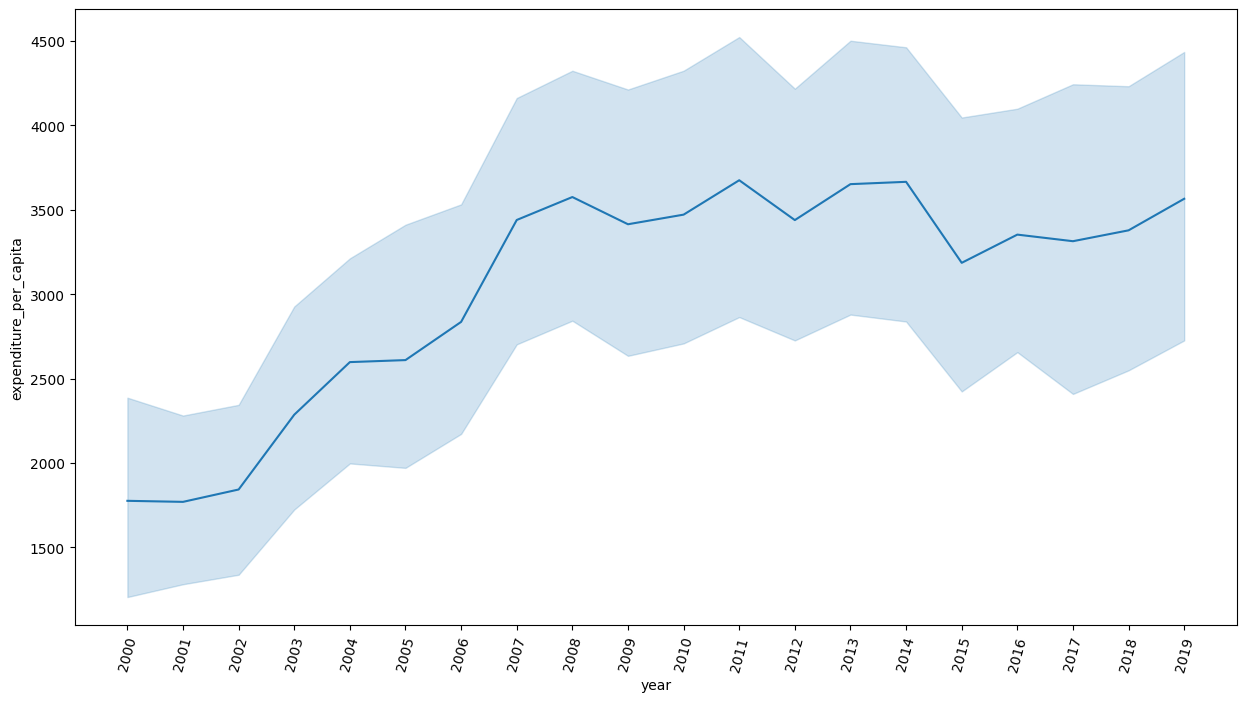

In [52]:
sns.lineplot(data = main_df, x = 'year', y = 'expenditure_per_capita');
plt.xticks(np.arange(min(main_df['year']), max(main_df['year'])+1, 1))
plt.xticks(rotation=75)
plt.show()

There is a steady increase in healthcare expenditure per capita from 2000 to around 2007, after which the growth rate stabilizes. A slight dip is observed during 2008–2009, likely reflecting the impact of the global financial crisis.

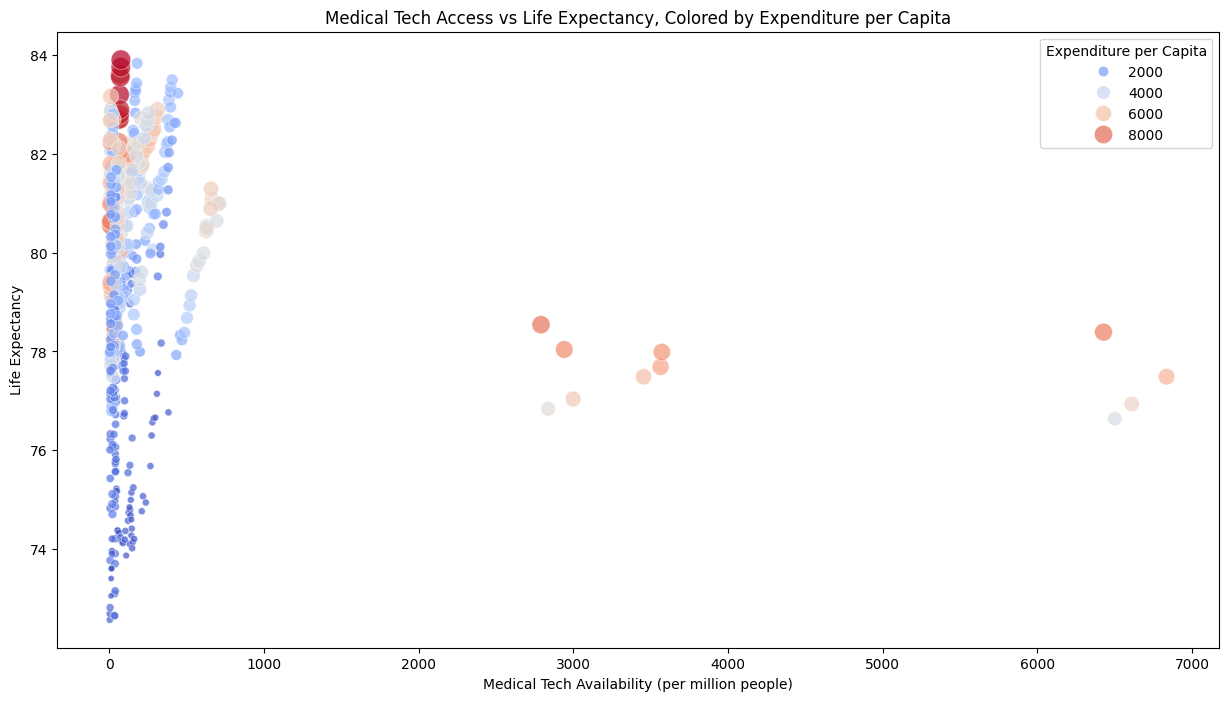

In [53]:
#Analyzes Medical Tech Access against Life Expectancy using the gradient of Healthcare Expernditure per Capita
sns.scatterplot(
    data=main_df,
    x='med_tech_availability_p_mil_ppl', 
    y='life_expectancy', 
    hue='expenditure_per_capita', 
    palette='coolwarm', 
    size='expenditure_per_capita', 
    sizes=(20, 200),
    alpha=0.7
)
plt.title("Medical Tech Access vs Life Expectancy, Colored by Expenditure per Capita")
plt.xlabel("Medical Tech Availability (per million people)")
plt.ylabel("Life Expectancy")
plt.legend(title="Expenditure per Capita")
plt.show()

This scatter plot compares life expectancy to medical technology availability, with dots colored by expenditure per capita. Higher expenditures are represented by warmer colors (orange/red). We can see an overall positive correlation between medical technology availability and life expectancy. Countries with higher levels of medical technology tend to have higher life expectancies. There is a cluster of outliers with low medical tech availability and high life expectancy. Countries with higher medical tech availability generally have higher life expectancy.


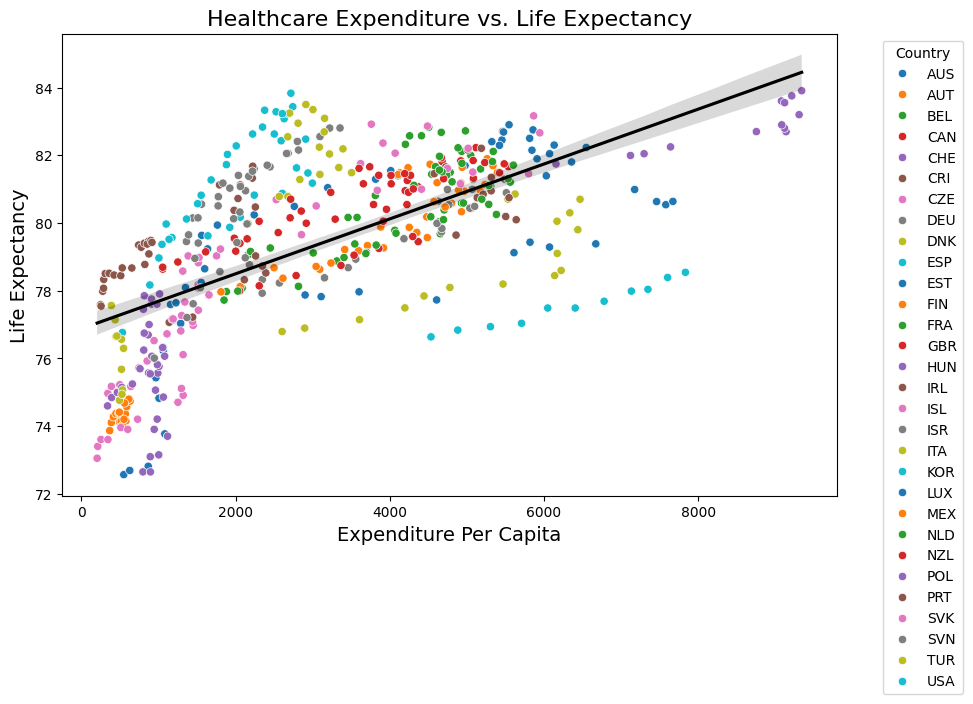

In [54]:
# correlation between life expectancy and health expenditure by capita
def per_capita_life_exp():
    df = pd.read_csv("cleaned_datasets/main_df.csv")
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='expenditure_per_capita', y='life_expectancy', hue='code', palette='tab10')
    sns.regplot(data=df, x='expenditure_per_capita', y='life_expectancy', scatter=False, color='black')
    plt.title('Healthcare Expenditure vs. Life Expectancy', fontsize=16)
    plt.xlabel('Expenditure Per Capita', fontsize=14)
    plt.ylabel('Life Expectancy', fontsize=14)
    plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
per_capita_life_exp()

This scatter plot visualizes the relationship between healthcare expenditure per capita and life expectancy, with points color-coded by country. A trend line highlights the overall positive correlation. A clear positive correlation exists between healthcare expenditure and life expectancy. Several countries achieve comparable life expectancy at lower expenditure levels, which shows efficiency in healthcare systems. Countries like the United States, with high expenditure but relatively lower life expectancy, indicate inefficiencies/disparities in healthcare delivery. Overall, higher healthcare spending generally corresponds with improved life expectancy.

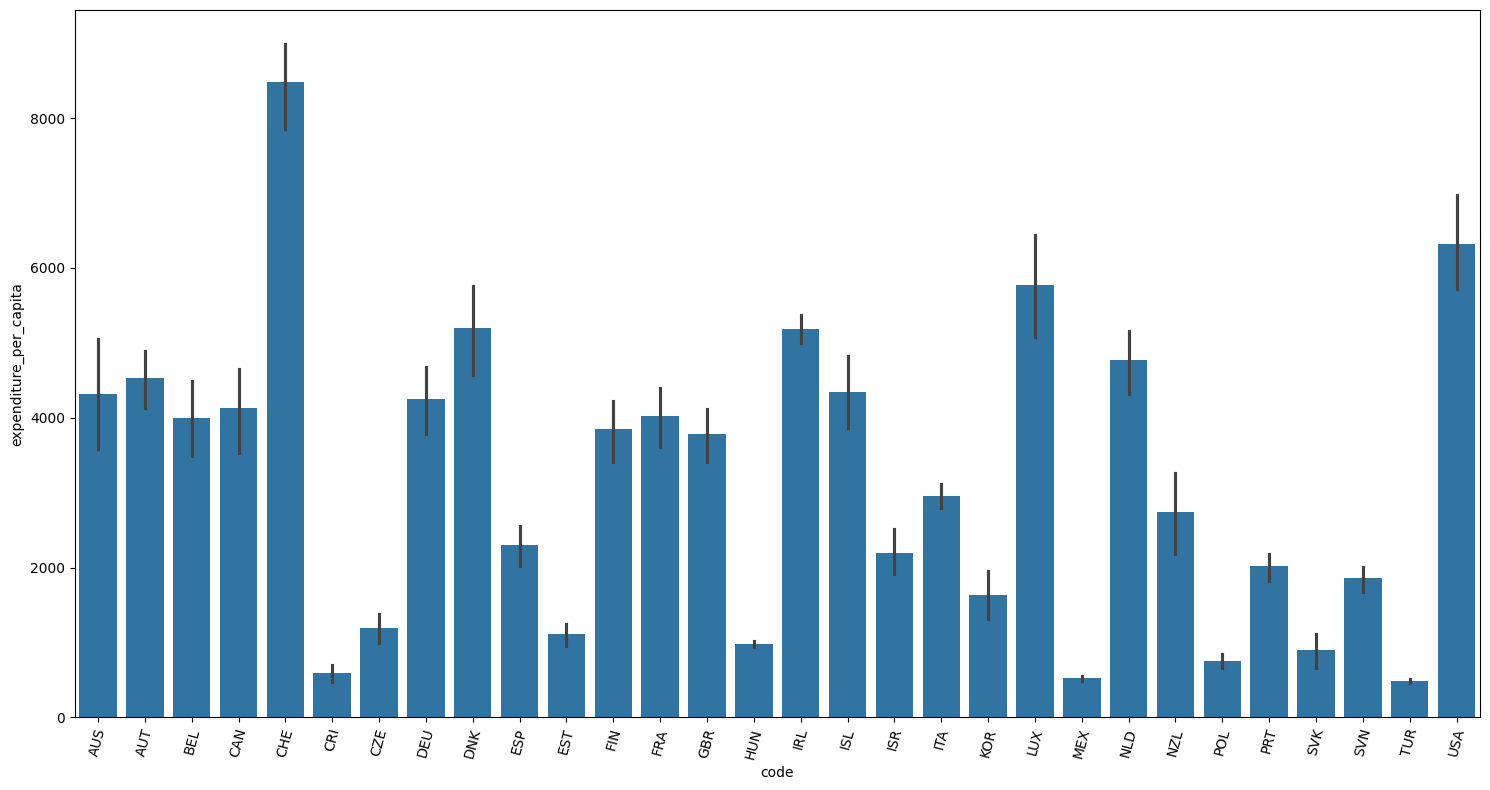

In [55]:
# expenditure per capita by country (mean over the years)
def expenditure_per_capita_by_country():
    df = pd.read_csv("cleaned_datasets/main_df.csv")
    sns.barplot(data = df, x = 'code', y = 'expenditure_per_capita');
    plt.xticks(rotation=75)
    plt.tight_layout()
    plt.show()

expenditure_per_capita_by_country()

The bar graph presents the expenditure per capita for various countries. The x-axis shows the country codes and the y-axis represents the expenditure per capita. Switzerland (CHE) has the highest healthcare expenditure per capita, while Turkey (TUR) has the lowest. The large variance in the data shows that we will be analyzing very different situations across countries. Having this variance could be useful in generalizing the results of this analysis to other countries, as it will provide insights into a large variety of healthcare expenditure sttrategies.

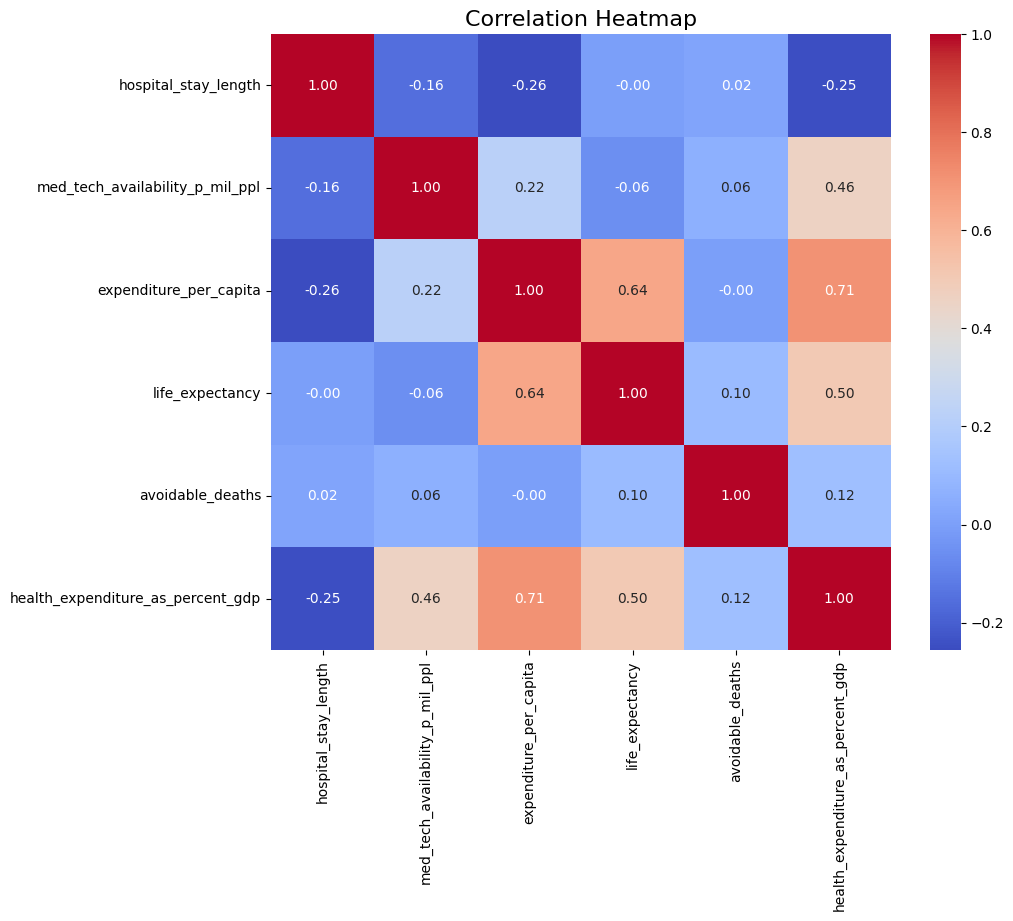

In [56]:
# correlation heat map for all variables
def heat_map_all_var():
    df = pd.read_csv("cleaned_datasets/main_df.csv")
    plt.figure(figsize=(10, 8))
    correlation_matrix = df[['hospital_stay_length', 'med_tech_availability_p_mil_ppl',
                                    'expenditure_per_capita', 'life_expectancy',
                                    'avoidable_deaths', 'health_expenditure_as_percent_gdp']].corr()

    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap', fontsize=16)
    plt.show()
    
heat_map_all_var()

 This correlation heatmap depicts the relationships between our healthcare variables. Positive correlations exist between expenditure per capita and life expectancy, suggesting that increased investment in healthcare can lead to better health (life expectancy) outcomes. Additionally, countries with greater availability of medical technology tend to allocate more resources to healthcare. On the other hand, longer hospital stays appear to be associated with lower healthcare expenditures. This is what we would expect, as more healthcare resources would allow for lower wait times. One interesting value to note is the correlation between expenditure per capita and avoidable deaths appears to be 0. This is surprising, as it would suggest that a change in healthcare per person does not seem to change the number of avoidable deaths. In other words, increasing spending does not necessarily lead to more lives saved.

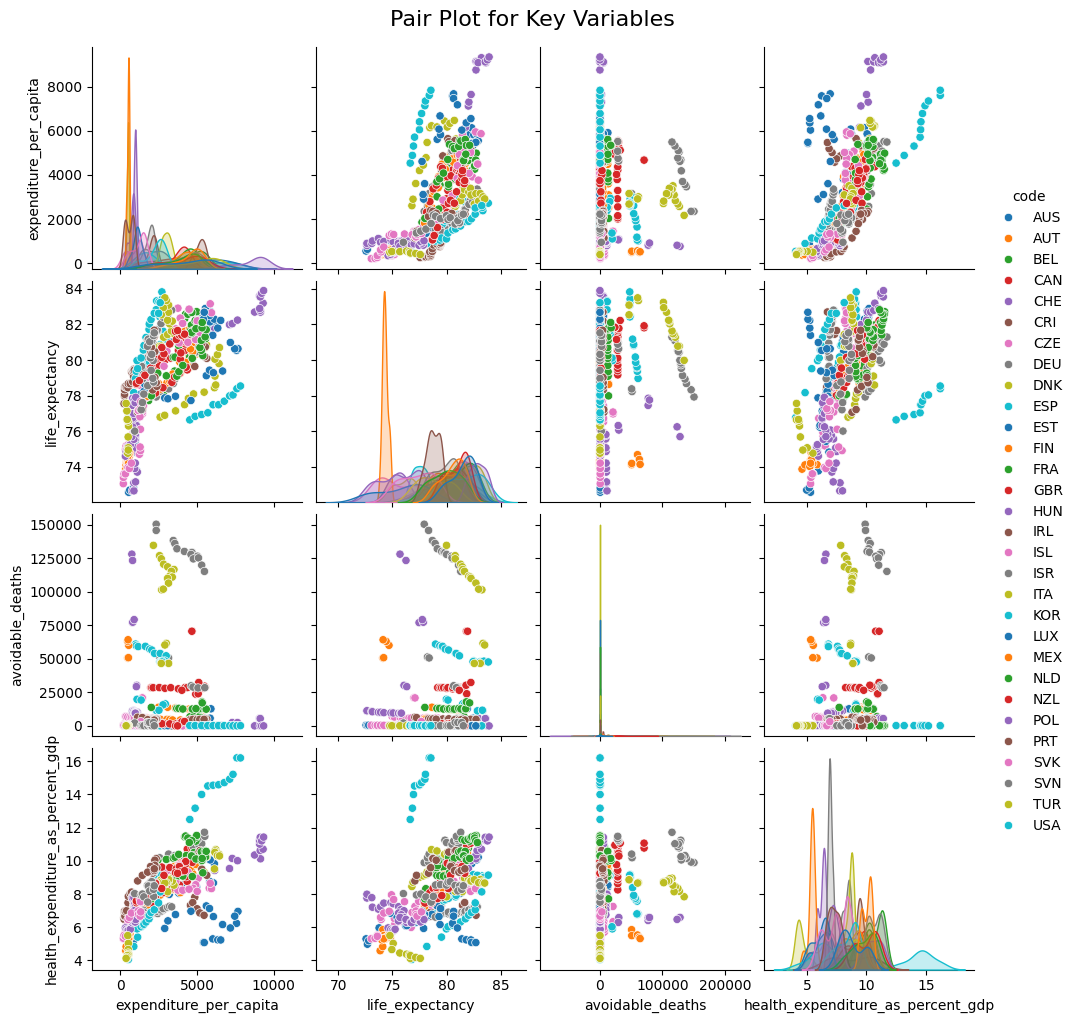

In [57]:
# key variables correlation plots
def key_variables_plot():
    df = pd.read_csv("cleaned_datasets/main_df.csv")
    sns.pairplot(df, vars=['expenditure_per_capita', 'life_expectancy', 
                                    'avoidable_deaths', 'health_expenditure_as_percent_gdp'],
                hue='code', palette='tab10', diag_kind='kde', height=2.5)
    plt.suptitle('Pair Plot for Key Variables', y=1.02, fontsize=16)
    plt.show()
    
key_variables_plot()

The pair plot provides a visual overview of the relationships between key healthcare variables. Like in the heat map, we can see that positive correlations are observed between expenditure per capita and life expectancy, suggesting that increased healthcare spending can lead to improved health outcomes. Additionally, there is a negative correlation between avoidable deaths and healthcare expenditure, indicating that countries with higher spending may have fewer preventable deaths. The scatter plot allows us to see that many variables do not increase in a linear pattern with expenditure per capita, so we may want to try out some nonlinear models in the future when trying to discern patterns between healthcare expenditure and other quality of care variables.

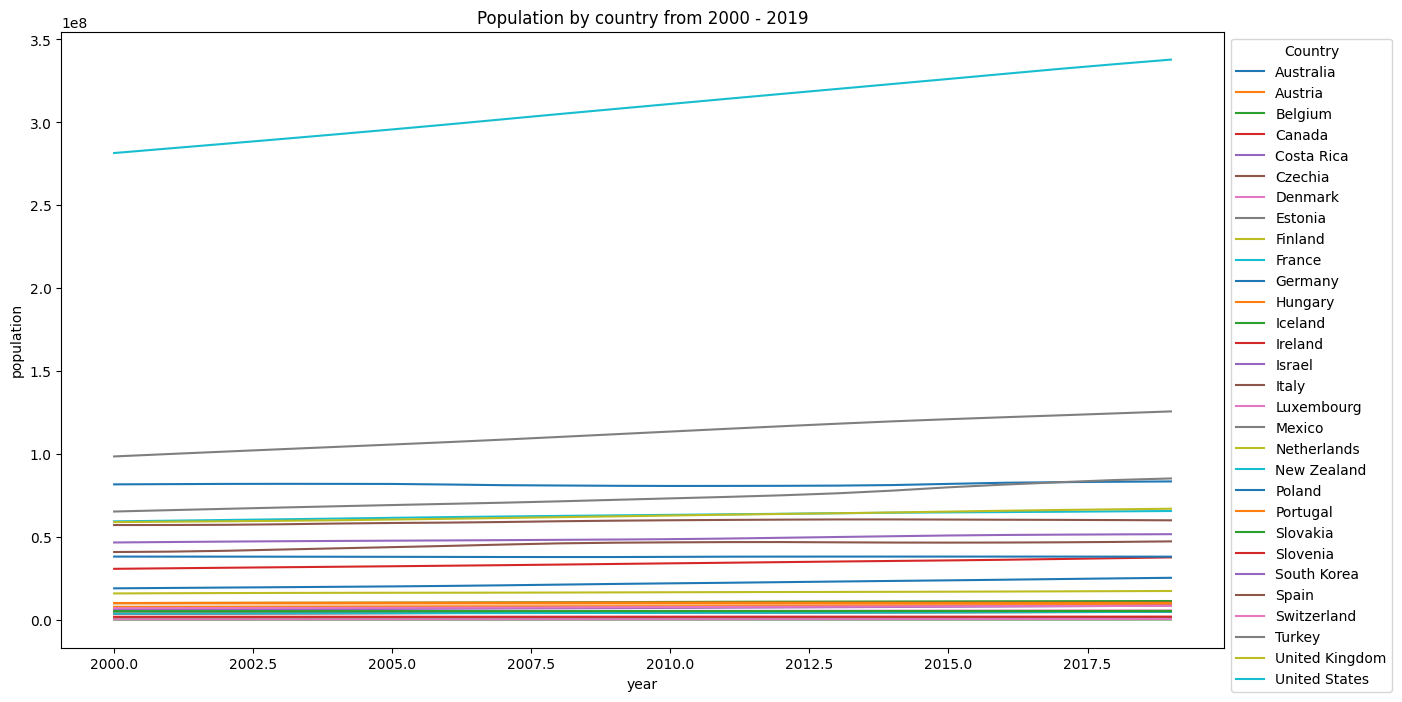

In [58]:
#population of all countries for each year
def population():
    df = pd.read_csv("cleaned_datasets/population.csv")
    sns.lineplot(hue = "country", x ="year",y = "population",data = df, palette = "tab10")
    plt.title("Population by country from 2000 - 2019")
    plt.legend(title='Country', bbox_to_anchor=(1, 1), loc='upper left')
    plt.show()

population()

 The line chart visualizes the population trends of various countries from 2000 to 2019. Each line represents a different country, and the y-axis indicates the population size in millions. We see that most countries experienced population growth over this period, with some countries showing steeper increases than others. Notably, the United States and the United Kingdom exhibit the most significant population growth during this timeframe. Several countries, such as Iceland, Ireland, and Israel, also demonstrate substantial population growth. In contrast, countries like Poland and Portugal show relatively stable or slightly declining population trends. This visualization provides a clear overview of population dynamics across different countries over our time period. Unsurprisingly, the United States is by far the most populous country in our dataset. This is because China and India are not considered OECD countries.

We have two metrics for understanding healthcare expenditure:
1. Healthcare expenditure per capita (expenditure divided by population)
2. Healthcare expenditure as a percent of gdp

Ideally, we would only need to analyze how one of these variables interracts with all other dependent variables. Let's see if we can actually make this assumption. In order for this assumption to hold, there should be a high correlation between healthcare expenditure per capita and healthcare expenditure for each country.

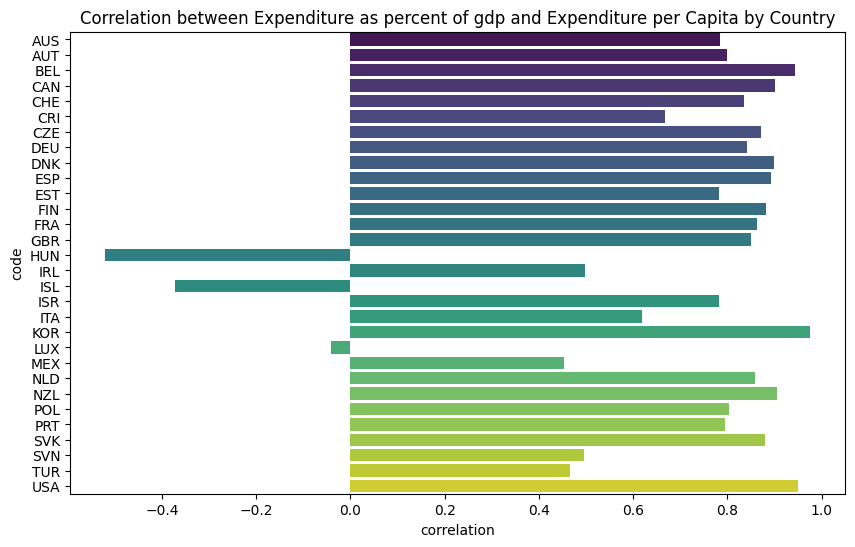

In [59]:
def health_expenditure_p_capita_vs_health_expenditure_as_perc_gdp():
    df = pd.read_csv('cleaned_datasets/main_df.csv')
    correlation_data = df.groupby('code').apply(
        lambda x: x['health_expenditure_as_percent_gdp'].corr(x['expenditure_per_capita'])
    ).reset_index(name='correlation')

    plt.figure(figsize=(10, 6))
    plt.title("Correlation between Expenditure as percent of gdp and Expenditure per Capita by Country")
    sns.barplot(data=correlation_data, y='code', x='correlation', palette='viridis')
    plt.show()
health_expenditure_p_capita_vs_health_expenditure_as_perc_gdp()

 It looks like there is a high correlation between the two types of expenditure for most countries. However, there are a few outliers: three countries have a negative correlation between the two types of expenditure. Let's look at the expenditures over time separately for these countries and see if we can understand what is happening.

In [60]:
# get negative expenditure correlation 
_NEG_EXPENDITURE_CORR_CODES = None
def get_neg_expenditure_corr_codes(correlation_data=None):
    if correlation_data is None:
        df = pd.read_csv('cleaned_datasets/main_df.csv')
        correlation_data = df.groupby('code').apply(
            lambda x: x['health_expenditure_as_percent_gdp'].corr(x['expenditure_per_capita'])
            ).reset_index(name='correlation')
    global _NEG_EXPENDITURE_CORR_CODES
    outlier_countries = correlation_data[correlation_data['correlation'] < 0]['code'].to_list()
    _NEG_EXPENDITURE_CORR_CODES = outlier_countries
    return _NEG_EXPENDITURE_CORR_CODES

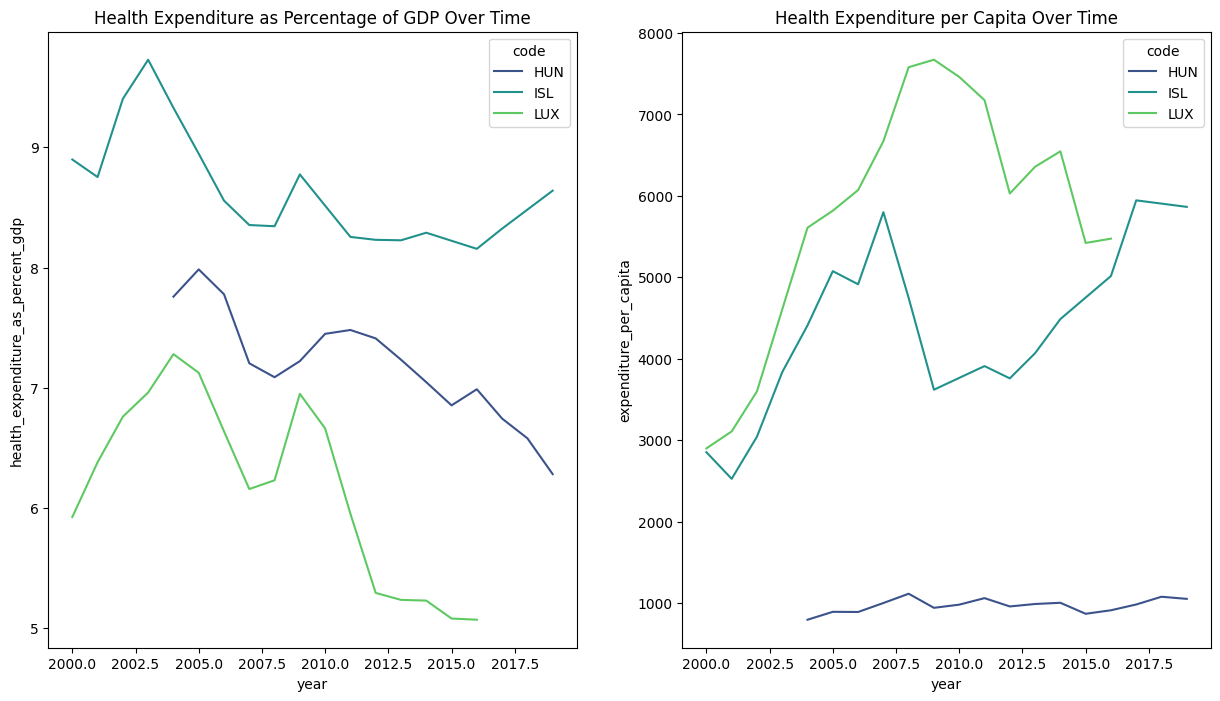

In [61]:
def analyze_neg_expenditure_correlations(df):
    correlation_data = df.groupby('code').apply(
        lambda x: x['health_expenditure_as_percent_gdp'].corr(x['expenditure_per_capita'])
    ).reset_index(name='correlation')
    outlier_countries = get_neg_expenditure_corr_codes(correlation_data)
    df_outliers = df[df['code'].isin(outlier_countries)]
    
    plt.rc('figure', figsize=(15, 8))
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False)
    sns.lineplot(data=df_outliers, x='year', y='health_expenditure_as_percent_gdp', hue='code',palette='viridis', ax=ax1)
    ax1.set_title('Health Expenditure as Percentage of GDP Over Time')
    sns.lineplot(data=df_outliers, x='year', y='expenditure_per_capita', hue='code', palette='viridis', ax=ax2)
    ax2.set_title('Health Expenditure per Capita Over Time')
    plt.show()
analyze_neg_expenditure_correlations(main_df)

Above, we have graphed the health expenditure per capita over time alongside the health expenditure as a percentage of the gdp over time for the three outlier countries. As we can see, the reason they have negative correlation is because for each of these countries, health expenditure as a percent of gdp is decreasing over time while health expenditure per capita is constant or increasing over time. This could be caused by differences in gdp growth and population growth during this time period. Let's do some further exploration to see if that is the case.

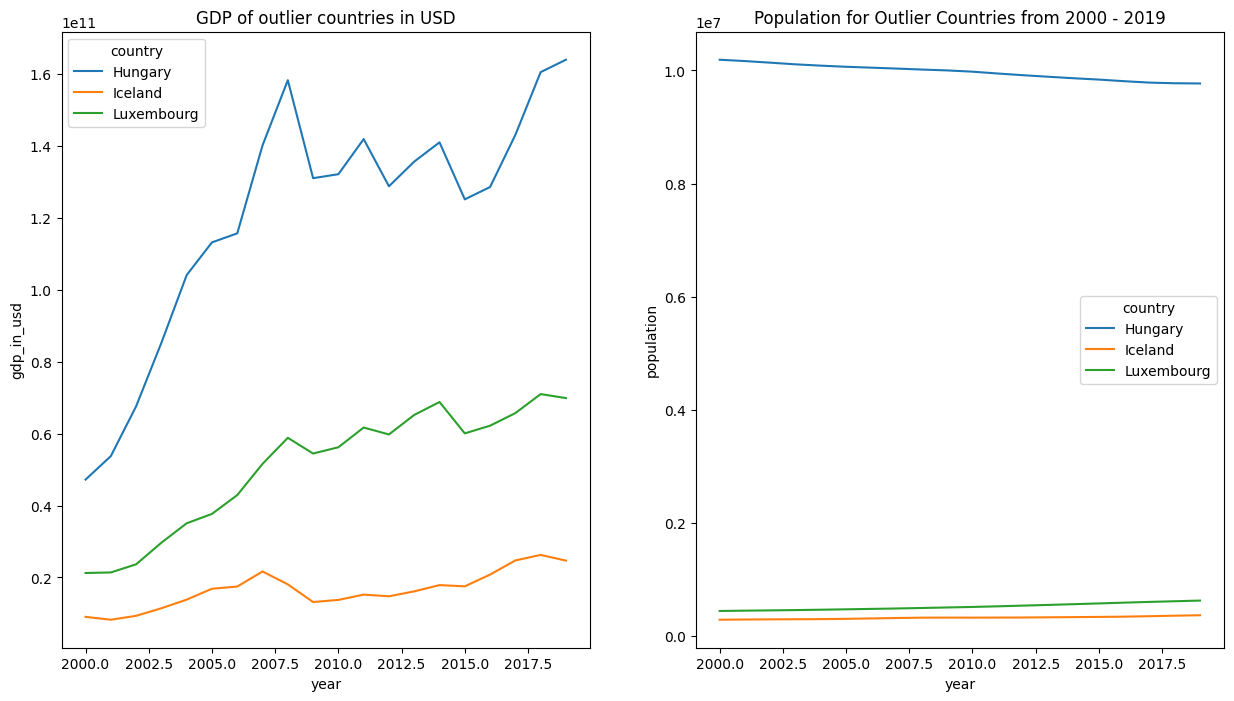

In [62]:
#closer look at populations with negative expenditure correlation for another analysis
def population_and_gdp_neg_expenditure_corr():
    gdp_df = pd.read_csv('cleaned_datasets/country_gdps.csv')
    population_df = pd.read_csv("cleaned_datasets/population.csv")
    outlier_countries = get_neg_expenditure_corr_codes()
    # get dataframes for gdp and population just for the outlier countries
    gdp_of_outliers = gdp_df[gdp_df['code'].isin(outlier_countries)]
    population_of_outliers = population_df[population_df['code'].isin(outlier_countries)]
    # plot the lineplots side by side
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False)
    ax1.set_title("GDP of outlier countries in USD")
    sns.lineplot(x='year', y='gdp_in_usd', hue='country', data=gdp_of_outliers, palette='tab10', ax=ax1)
    ax2.set_title("Population for Outlier Countries from 2000 - 2019")
    sns.lineplot(hue = "country", x ="year",y = "population",data = population_of_outliers, palette = "tab10", ax=ax2)
    # plt.legend(title='Country', bbox_to_anchor=(1, 1), loc='upper left')
    plt.show()
population_and_gdp_neg_expenditure_corr()

Here, we can see that the gdp and population of these 3 countries are in fact growing at different rates. For each of the three countries, the gdp is increasing while the population is barely increasing or, in the case of Hungary, the population is actually decreasing. Using these visualizations, we can understand why there is a negative correlation between healthcare as a percentage of gdp and healthcare per capita for these 3 countries: their gdp is increasing substantially faster than their populations, meaning the same healthcare expenditure values when viewed from these 2 different perspectives show different values. However, since this is only the case with these 3 countries, we will use healthcare per capita (without worrying about gdp) to understand the relationship between healthcare spending and our various dependent quality of care variables. This also makes sense for most of the metrics, since it is often more useful in the case of medical success to look at spending in relation to population as opposed to gdp. The reason for this is that population directly impacts how stretched thin a country's healthcare system is, while gdp does not necessarily directly affect the healthcare system. Ultimately, we are safe to just use healthcare per capita while analyzing other variables.

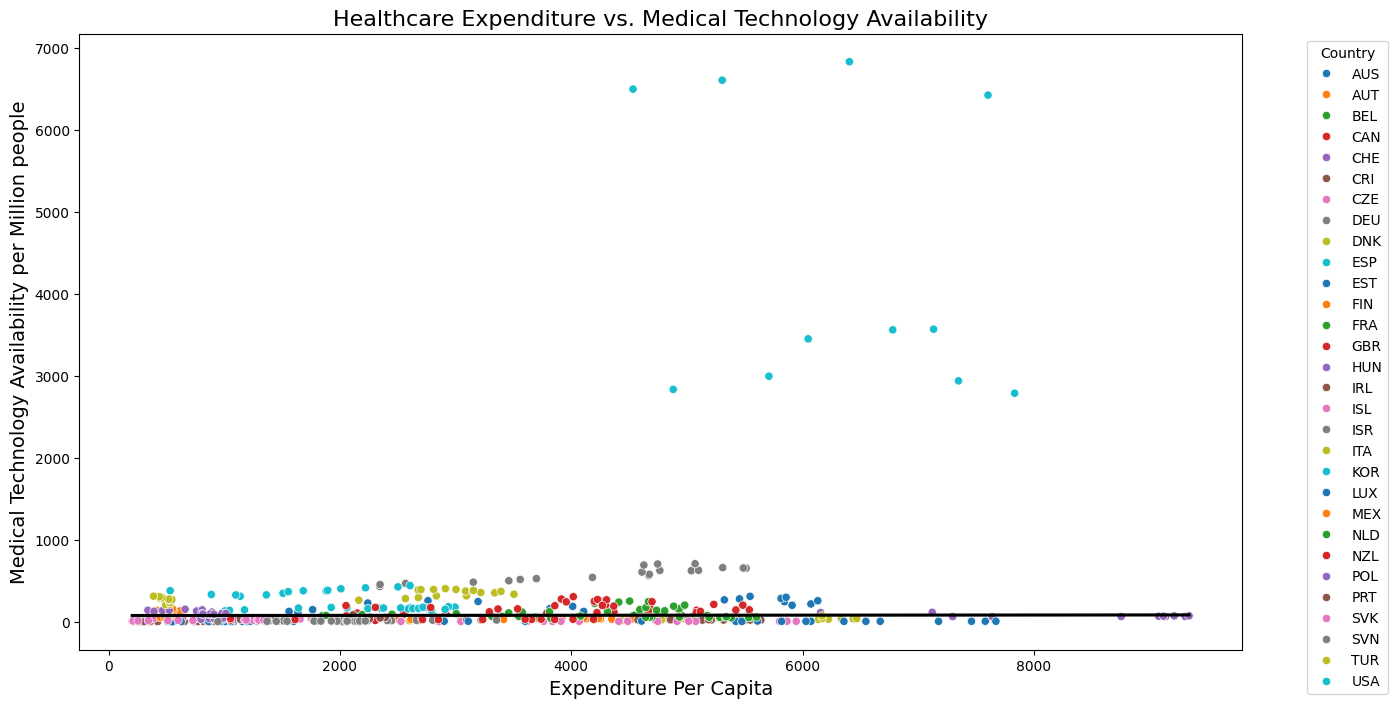

In [63]:
def per_capita_med_tech_availability(df):
    sns.scatterplot(data=df, x='expenditure_per_capita', y='med_tech_availability_p_mil_ppl', hue='code', palette='tab10')
    sns.regplot(data=df, x='expenditure_per_capita', y='life_expectancy', scatter=False, color='black')
    plt.title('Healthcare Expenditure vs. Medical Technology Availability', fontsize=16)
    plt.xlabel('Expenditure Per Capita', fontsize=14)
    plt.ylabel('Medical Technology Availability per Million people', fontsize=14)
    plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
per_capita_med_tech_availability(main_df)

The scatter plot visualizes the relationship between healthcare expenditure per capita and medical technology availability per million people across various countries. While there is a general trend suggesting that countries with higher expenditure per capita tend to have higher medical technology availability, it is not very strong, and we concluded that there is no strong correlation. There is too much variation among countries, with some countries having high expenditure but relatively low technology availability, and vice versa. Furthermore, the trend is almost flat, meaning that not only is there not a strong correlation, but there is also a very small effect. This demonstrates that healthcare expenditure per capita is not a good indicator of medical technological availability.

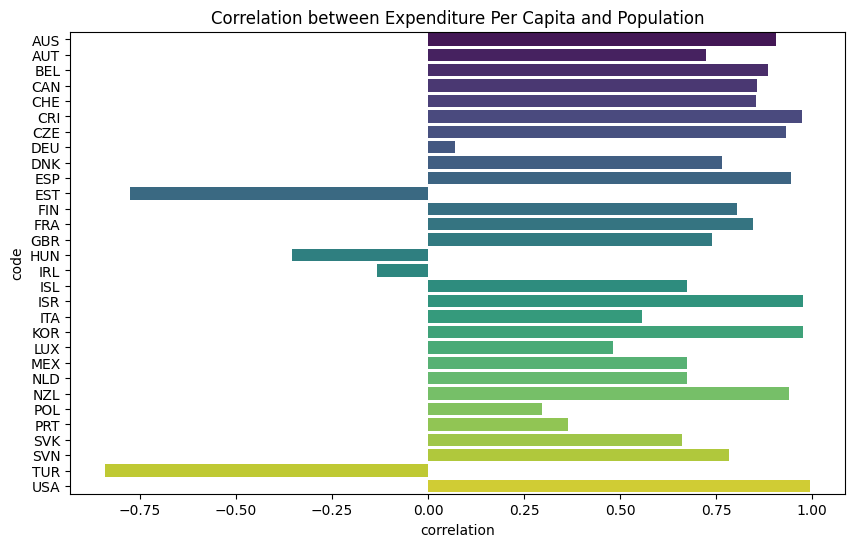

In [64]:
#population by exepnditure correlation
def population_by_expenditure_per_capita():
    df_pop = pd.read_csv("cleaned_datasets/population.csv")
    df_main = pd.read_csv("cleaned_datasets/main_df.csv")
    merged_df = df_main.merge(df_pop, on = ['code','year'],how = 'inner')

    correlation_data = merged_df.groupby('code').apply(
        lambda x: x['population'].corr(x['expenditure_per_capita'])
    ).reset_index(name='correlation')

    plt.figure(figsize=(10, 6))
    plt.title("Correlation between Expenditure Per Capita and Population")
    sns.barplot(data=correlation_data, y='code', x='correlation', palette='viridis', hue = 'code', legend = False)
    plt.show()
population_by_expenditure_per_capita()

The bar chart visualizes the correlation between expenditure per Capita and population size. Each bar represents a country, and the length of the bar indicate the strength and direction of the correlation. Positive correlations suggest that countries with higher expenditure per capita tend to have larger populations, while negative correlations indicate the opposite. Overall, we can see that there is a positive correlation between expenditure per capita and population, other than the few outliers (Estonia, Hungary, Ireland, and Turkey). If we look at countries with 0 correlation, it would mean that over the years as population changes, this has little effect on the expenditure per capita. This would indicate that with the change in population, the expenditure is changing at roughly the same rate, meaning the amount of people does not affec the amount of healthcare expenditure per person. For the majority of countries, this is not the case, however as population changes, the expenditure per person changes with it. In other words, as the population grows, so too does the amount of healthcare spending per person, meaning total expenditure (not per person) is growing faster than the population, rather than at the same rate. With the outliers, the opposite is true: as the population grows, the expenditure per person is not keeping up. This could meant that the expenditure is stagnant while the population grows, among other possibilities (like expenditure per person increasing as population decreases). Overall, this chart is a good indicator of how countries are keeping up with their healthcare expenditure in relation to population changes.

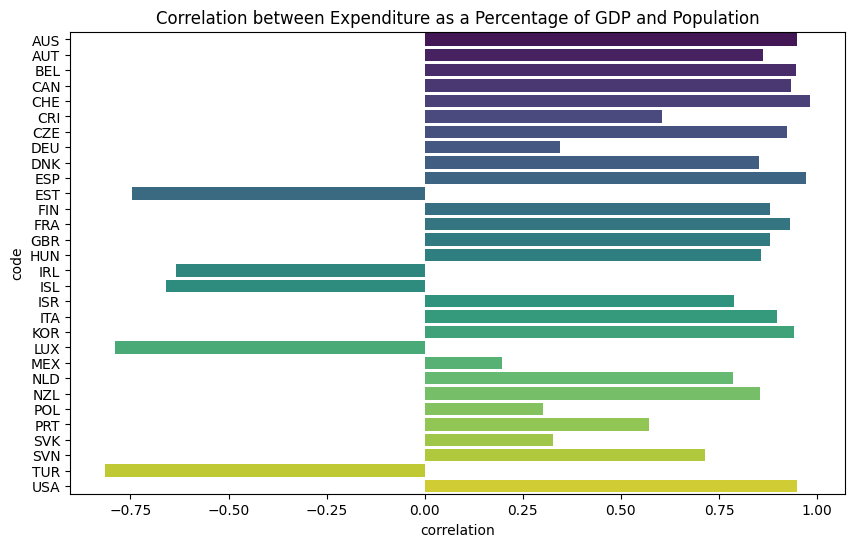

In [65]:
#population by gdp correlation
def population_by_percent_gdp():
    df_pop = pd.read_csv("cleaned_datasets/population.csv")
    df_main = pd.read_csv("cleaned_datasets/main_df.csv")
    merged_df = df_main.merge(df_pop, on = ['code','year'],how = 'inner')

    correlation_data = merged_df.groupby('code').apply(
        lambda x: x['population'].corr(x['health_expenditure_as_percent_gdp'])
    ).reset_index(name='correlation')

    plt.figure(figsize=(10, 6))
    plt.title("Correlation between Expenditure as a Percentage of GDP and Population")
    sns.barplot(data=correlation_data, y='code', x='correlation', palette='viridis', hue = 'code', legend = False)
    plt.show()
population_by_percent_gdp()

The bar chart visualizes the correlation between expenditure as a percentage of GDP and population size. Overall, most countries have a positive correlation between expenditure as a percentage of GDP and population, other than the outliers (Estonia, Ireland, Iceland, Luxembourg, and Turkey). A near zero correlation would indicate that a country's change in population does not affect its healthcare expenditure per capita. If population and gdp were to grow at similar ratios, then this would likely have a large impact on the healthcare expenditure per capita. However, if population were to grow faster than gdp, the amount spent per person would decrease over time, potentially leading to issues of an overburdened healthcare system. Countries with positive correlations would indicate that those countries are in tune with the growth of population and change their healthcare spending in correlation with the change in population; as a population grows, so too does the amount spent as a percentage of gdp. Alternatively, it could also mean that shrinking populations would require less expenditure. A negative correlation could be an indication that a country is valuing healthcare expenditure as the population decreases or slows. For example, fewer kids are being born, so the average age of the population increases, leading to more necessary healthcare expenditure for the country. Of course, it is impossible to make such a statement from just this one graph. That said, they are interesting datapoints to keep an eye on. 

We can notice that the outliers of the three graphs overlap (Hungary, Ireland, Estonia, Iceland, and Luxembourg all overlap at some point).

# Ethics & Privacy

* In terms of data collection, we do not have to deal with informed consent or anything related to the creation of a study, because we are using previously-compiled datasets.
* As for data storage, we don’t need to secure the data that we have gathered here, because they are all from readily available online datasets. There will be no “individuals” in our dataset because we are collecting data by country rather than by individual patients, so no anonymizing or ‘right to be forgotten’ needs to be addressed.
* There are additional potential confounding variables to our analysis such as education of the healthcare providers, lifestyles by country, and access to resources not directly relating to healthcare itself, as such, this study is purely intended to explore correlation between the established variables, not establish causality.
* The data may not adequately represent marginalized populations or those without access to healthcare, leading to skewed results Some countries may report healthcare outcomes differently, leading to potential bias - countries with less rigorous data collection systems may underreport certain issues.
* We will avoid looking at data within LCD countries, specifically focusing on OECD countries. This is because high-income countries often provide more detailed healthcare data than low-income or developing countries. This lack of data from lower-income nations could skew analyses toward healthcare systems that are well-funded, leading to overgeneralized findings that don’t apply to all income levels. Also, for LDC countries, there might be other strong reasons for why healthcare might be low quality other than healthcare spending (e.g. war).
* Country-level data might also cover some disparities among different minority groups in each country. For example, in the US, healthcare quality significantly varies across different states and cities, so the overall data of the country might misrepresent the level of healthcare quality received by its citizens. For this problem, if OECD provides regional data for bigger countries, we should incorporate these regional variations.
* Over-simplifications of the effects of spending and healthcare, if interpreted for policy-making could lead to a focus on only financially efficient initiatives and not initiatives that are currently critical in their country. This is not intended to inform political or financial decisions.

# Discusison and Conclusion

Wrap it all up here.  Somewhere between 3 and 10 paragraphs roughly.  A good time to refer back to your Background section and review how this work extended the previous stuff. 


# Team Contributions

Speficy who did what.  This should be pretty granular, perhaps bullet points, no more than a few sentences per person.